<a href="https://colab.research.google.com/github/GarreauArthur/rgbspace/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

# The data

first download the data

In [58]:
!rm -rf rgbspace
!git clone https://github.com/GarreauArthur/rgbspace.git

Cloning into 'rgbspace'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 12), reused 10 (delta 4), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [59]:
data = pd.read_csv("./rgbspace/data.csv")
data.head()

,red,blue,green,color
0,66.0,94.0,219.0,4.0
1,183.0,50.0,118.0,0.0
2,125.0,68.0,120.0,5.0
3,250.0,44.0,144.0,0.0
4,55.0,205.0,178.0,3.0


The data is made of 4 column, one for each color RGB, and one giving the label of the color:

* 0 is red
* 1 is yellow
* 2 is green
* 3 is cyan
* 4 is blue
* 5 is magenta

Let's extract the data, and normalize the inputs

In [60]:
color = data.loc[:, 'color']
rgb = data.loc[:, :'green']
normalized_rgb = (rgb-128)/255
normalized_rgb.head()

,red,blue,green
0,-0.243137,-0.133333,0.356863
1,0.215686,-0.305882,-0.039216
2,-0.011765,-0.235294,-0.031373
3,0.478431,-0.329412,0.062745
4,-0.286275,0.301961,0.196078


Let's try to visualize the data

(0, 50, -100, 10)

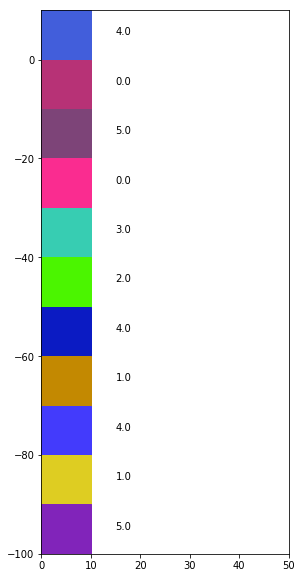

In [61]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')
for i in range(0,11):
  pixel = rgb.loc[i, :].values/255
  rec = patches.Rectangle((0, -i*10), 10, 10, color=pixel)
  ax.add_patch(rec)
  ax.text(15, -i*10 + 5, color.loc[i])
  
plt.axis((0,50,-100,10))

In [62]:
print(rgb.loc[1, :].values/255)

[0.71764706 0.19607843 0.4627451 ]


Let's define the size of our data sets

In [63]:
total_number_of_examples = rgb['red'].count()

m_train_int = int(total_number_of_examples*0.8)
m_dev_int = int(total_number_of_examples*0.1)
m_test_int = int(total_number_of_examples*0.1)


m_train = np.float64(m_train_int)
m_dev   = np.float64(m_dev_int)
m_test  = np.float64(m_test_int)
print(m_train, m_test, m_dev)

8000.0 1000.0 1000.0


Now, we prepare the datasets

In [64]:
# split the dataset in 3
x_train = normalized_rgb.loc[:(m_train-1), 'red':'green'].values
x_dev = normalized_rgb.loc[m_train:(m_train+m_dev-1), 'red':'green'].values
x_test = normalized_rgb.loc[(m_train+m_dev):, 'red':'green'].values
# shape (number of feature, number of example

# transform the color (output) into a one hot vector
nb_classes = 6
Y = color.astype('int64').values.reshape(-1)
one_hot = np.eye(nb_classes)[Y]
one_hot = one_hot.reshape(10000, 6)

y_train = one_hot[:(m_train_int), :]
y_dev = one_hot[m_train_int:(m_train_int+m_dev_int), :]
y_test = one_hot[(m_train_int+m_dev_int):, :]
print(y_train.shape)

(8000, 6)


Let's build a tensorflow 2 model

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

Train



In [66]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

Train on 8000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 84us/sample - loss: 1.6974 - accuracy: 0.3291
Epoch 2/20
8000/8000 [==============================] - 1s 76us/sample - loss: 1.2887 - accuracy: 0.5174
Epoch 3/20
8000/8000 [==============================] - 1s 76us/sample - loss: 0.7986 - accuracy: 0.7574
Epoch 4/20
8000/8000 [==============================] - 1s 69us/sample - loss: 0.5114 - accuracy: 0.9247
Epoch 5/20
8000/8000 [==============================] - 1s 71us/sample - loss: 0.3630 - accuracy: 0.9506
Epoch 6/20
8000/8000 [==============================] - 1s 71us/sample - loss: 0.2830 - accuracy: 0.9620
Epoch 7/20
8000/8000 [==============================] - 1s 69us/sample - loss: 0.2351 - accuracy: 0.9699
Epoch 8/20
8000/8000 [==============================] - 1s 72us/sample - loss: 0.2044 - accuracy: 0.9740
Epoch 9/20
8000/8000 [==============================] - 1s 68us/sample - loss: 0.1813 - accuracy: 0.9741
Epoch 10/20
8000/8000 [==========

In [67]:
model.evaluate(x_test, y_test)

1000/1000 [==============================] - 0s 81us/sample - loss: 0.0901 - accuracy: 0.9830


[0.09007825693488121, 0.983]

In [68]:
data_pred = np.array([[255,1,1], [1, 255, 1], [1, 1, 255], [237,	235, 112]])
print(model.predict(data_pred))

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]]
